# MiVOLO Custom

## Download repo && pretrained weight

In [1]:
!git clone https://github.com/KoaBou/Masked_Age_Detection.git
%cd Masked_Age_Detection/

Cloning into 'Masked_Age_Detection'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 227 (delta 95), reused 85 (delta 66), pack-reused 87
Receiving objects: 100% (227/227), 829.51 KiB | 2.17 MiB/s, done.
Resolving deltas: 100% (114/114), done.
/content/Masked_Age_Detection


In [2]:
!pip install -r requirements.txt
!pip install .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.9 MB/s eta 0:00:00
Processing /content/Masked_Age_Detection
  Preparing metadata (setup.py) ... done
  Created wheel for mivolo: filename=mivolo-0.4.2.dev0-py3-none-any.whl size=37558 sha256=533ec139400b12f771eab6a418f9fe4abcf8f2b7e4576d5c252f3349294b6fec
  Stored in directory: /tmp/pip-ephem-wheel-cache-w4xapljt/wheels/ac/11/ba/c60eec1d91023f04fe3cae7178f17e92408cafbb10b1ea

In [3]:
!mkdir models
# Cài đặt thư viện gdown (nếu chưa cài đặt)
!pip install gdown

# Sử dụng gdown để tải file từ Google Drive
import gdown

# Đường dẫn đến file trên Google Drive
url = 'https://docs.google.com/uc?export=download&id=11i8pKctxz3wVkDBlWKvhYIh7kpVFXSZ4'

# Đường dẫn đến nơi lưu trữ file trên Colab
output = 'models/mivolo_imbd.pth.tar'

# Sử dụng gdown để tải file
gdown.download(url, output, quiet=False)

# Đường dẫn đến file trên Google Drive
url = 'https://docs.google.com/uc?export=download&id=1CGNCkZQNj5WkP3rLpENWAOgrBQkUWRdw'

# Đường dẫn đến nơi lưu trữ file trên Colab
output = 'models/yolov8x_person_face.pt'

# Sử dụng gdown để tải file
gdown.download(url, output, quiet=False)


Downloading...
From: https://docs.google.com/uc?export=download&id=11i8pKctxz3wVkDBlWKvhYIh7kpVFXSZ4
To: /content/Masked_Age_Detection/models/mivolo_imbd.pth.tar
100%|██████████| 110M/110M [00:02<00:00, 51.9MB/s]
Downloading...
From: https://docs.google.com/uc?export=download&id=1CGNCkZQNj5WkP3rLpENWAOgrBQkUWRdw
To: /content/Masked_Age_Detection/models/yolov8x_person_face.pt
100%|██████████| 137M/137M [00:05<00:00, 26.5MB/s]


'models/yolov8x_person_face.pt'

## Load model

In [4]:
from collections import defaultdict
from typing import Dict, Generator, List, Optional, Tuple

import cv2
import numpy as np
import torch
import tqdm
from mivolo.model.mi_volo import MiVOLO
from mivolo.model.yolo_detector import Detector
from mivolo.structures import AGE_GENDER_TYPE, PersonAndFaceResult
# from mivolo.model.mivolo_model import *
from mivolo.model.create_timm_model import create_model

In [5]:
# Example usage of create_model function
model_name = "mivolo_d1_224"  # You can specify the Mivolo model architecture
checkpoint_path = "path/to/your/checkpoint.pth"  # Provide the path to your checkpoint file if available

# Create the Mivolo model
model = create_model(
    model_name=model_name,
    pretrained=False,  # Set to True if you want to use a pretrained model
    checkpoint_path=None,
    filter_keys=["fds."],  # Optional: filter specific keys during loading
    # Additional arguments...
)

# Now, you can use the created model for inference or further processing

### MiVOLO

In [6]:
from torchsummary import summary
model = model.cuda()
summary(model, (3, 223, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
            Conv2d-4         [-1, 64, 112, 112]          36,864
       BatchNorm2d-5         [-1, 64, 112, 112]             128
              ReLU-6         [-1, 64, 112, 112]               0
            Conv2d-7         [-1, 64, 112, 112]          36,864
       BatchNorm2d-8         [-1, 64, 112, 112]             128
              ReLU-9         [-1, 64, 112, 112]               0
           Conv2d-10          [-1, 192, 28, 28]         196,800
       PatchEmbed-11          [-1, 192, 28, 28]               0
        LayerNorm-12          [-1, 28, 28, 192]             384
           Linear-13          [-1, 28, 28, 192]          36,864
           Unfold-14            [-1, 17

In [7]:
checkpoint = torch.load('/content/Masked_Age_Detection/models/mivolo_imbd.pth.tar')

for key in checkpoint.keys():
  if key != 'state_dict':
    print(key+':',checkpoint[key])

print()

for key, value in checkpoint['state_dict'].items():
  print(key)


min_age: 1
max_age: 95
avg_age: 48.0
no_gender: False
with_persons_model: True

pos_embed
cls_token
patch_embed.conv1.0.weight
patch_embed.conv1.1.weight
patch_embed.conv1.1.bias
patch_embed.conv1.1.running_mean
patch_embed.conv1.1.running_var
patch_embed.conv1.1.num_batches_tracked
patch_embed.conv1.3.weight
patch_embed.conv1.4.weight
patch_embed.conv1.4.bias
patch_embed.conv1.4.running_mean
patch_embed.conv1.4.running_var
patch_embed.conv1.4.num_batches_tracked
patch_embed.conv1.6.weight
patch_embed.conv1.7.weight
patch_embed.conv1.7.bias
patch_embed.conv1.7.running_mean
patch_embed.conv1.7.running_var
patch_embed.conv1.7.num_batches_tracked
patch_embed.conv2.0.weight
patch_embed.conv2.1.weight
patch_embed.conv2.1.bias
patch_embed.conv2.1.running_mean
patch_embed.conv2.1.running_var
patch_embed.conv2.1.num_batches_tracked
patch_embed.conv2.3.weight
patch_embed.conv2.4.weight
patch_embed.conv2.4.bias
patch_embed.conv2.4.running_mean
patch_embed.conv2.4.running_var
patch_embed.conv2.4.

In [8]:
new_state_dict = {}

for key, value in checkpoint['state_dict'].items():
  if 'map' in key:
    new_state_dict[key.replace('map', 'maskedMap')] = value
    new_state_dict[key.replace('map', 'nonMaskedMap')] = value
  else:
    new_state_dict[key] = value

In [9]:
for key, value in new_state_dict.items():
  print(key)

pos_embed
cls_token
patch_embed.conv1.0.weight
patch_embed.conv1.1.weight
patch_embed.conv1.1.bias
patch_embed.conv1.1.running_mean
patch_embed.conv1.1.running_var
patch_embed.conv1.1.num_batches_tracked
patch_embed.conv1.3.weight
patch_embed.conv1.4.weight
patch_embed.conv1.4.bias
patch_embed.conv1.4.running_mean
patch_embed.conv1.4.running_var
patch_embed.conv1.4.num_batches_tracked
patch_embed.conv1.6.weight
patch_embed.conv1.7.weight
patch_embed.conv1.7.bias
patch_embed.conv1.7.running_mean
patch_embed.conv1.7.running_var
patch_embed.conv1.7.num_batches_tracked
patch_embed.conv2.0.weight
patch_embed.conv2.1.weight
patch_embed.conv2.1.bias
patch_embed.conv2.1.running_mean
patch_embed.conv2.1.running_var
patch_embed.conv2.1.num_batches_tracked
patch_embed.conv2.3.weight
patch_embed.conv2.4.weight
patch_embed.conv2.4.bias
patch_embed.conv2.4.running_mean
patch_embed.conv2.4.running_var
patch_embed.conv2.4.num_batches_tracked
patch_embed.conv2.6.weight
patch_embed.conv2.7.weight
patch_

In [10]:
checkpoint['state_dict'] = new_state_dict

torch.save(checkpoint, '/content/Masked_Age_Detection/models/new_mivolo.pth.tar')

In [11]:
from mivolo.model.cross_bottleneck_attn import CrossBottleneckAttn

maskedMap = CrossBottleneckAttn(6, dim_out=6, num_heads=1, feat_size=[4, 8])

for param_tensor in maskedMap.state_dict():
    print(param_tensor, "\t", maskedMap.state_dict()[param_tensor].size())


qkv_f.weight 	 torch.Size([22, 6, 1, 1])
qkv_p.weight 	 torch.Size([22, 6, 1, 1])
pos_embed.height_rel 	 torch.Size([7, 8])
pos_embed.width_rel 	 torch.Size([15, 8])
norm.weight 	 torch.Size([12, 4, 8])
norm.bias 	 torch.Size([12, 4, 8])
mlp.fc1.weight 	 torch.Size([24, 12, 1, 1])
mlp.fc1.bias 	 torch.Size([24])
mlp.fc2.weight 	 torch.Size([6, 24, 1, 1])
mlp.fc2.bias 	 torch.Size([6])


### Predictor

In [12]:
import os
from typing import Dict, Union

import numpy as np
import PIL
import torch
from mivolo.structures import PersonAndFaceResult
from ultralytics.yolo.engine.model import YOLO
from ultralytics.yolo.engine.results import Results

yolo_weight = YOLO('/content/Masked_Age_Detection/models/yolov8x_person_face.pt')

WARNING ⚠️ /content/Masked_Age_Detection/models/yolov8x_person_face.pt appears to require 'omegaconf', which is not in ultralytics requirements.
AutoInstall will run now for 'omegaconf' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement "omegaconf" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=978545945cb564d39379c79e6e41ebecadc934d1c86851d1af1ea219087fd47f
  Stored in directory: /tmp/pip-ephem-wheel-cache-_djekgbd/wheel

# Predict

In [13]:
!wget https://variety.com/wp-content/uploads/2023/04/MCDNOHA_SP001.jpg -O jennifer_lawrence.jpg

!python3 demo.py \
--input "jennifer_lawrence.jpg" \
--output "output" \
--detector-weights "models/yolov8x_person_face.pt " \
--checkpoint "/content/Masked_Age_Detection/models/new_mivolo.pth.tar" \
--device "cuda" \
--with-persons \
--draw

--2023-12-24 01:23:35--  https://variety.com/wp-content/uploads/2023/04/MCDNOHA_SP001.jpg
Resolving variety.com (variety.com)... 192.0.66.176
Connecting to variety.com (variety.com)|192.0.66.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 416073 (406K) [image/jpeg]
Saving to: ‘jennifer_lawrence.jpg’

jennifer_lawrence.j 100%[===================>] 406.32K  --.-KB/s    in 0.04s   

2023-12-24 01:23:35 (11.0 MB/s) - ‘jennifer_lawrence.jpg’ saved [416073/416073]

Model summary (fused): 268 layers, 68125494 parameters, 0 gradients
Model meta:
min_age: 1, max_age: 95, avg_age: 48.0, num_classes: 3, in_chans: 6, with_persons_model: True, disable_faces: False, use_persons: True, only_age: False, num_classes_gender: 2, use_person_crops: True, use_face_crops: True
Loaded state_dict from checkpoint '/content/Masked_Age_Detection/models/new_mivolo.pth.tar'
Model mivolo_d1_224 created, param count: 28720158
Data processing configuration for current model + dataset:
	in

In [14]:
from mivolo.model.mi_volo import MiVOLO
new_model = MiVOLO("/content/Masked_Age_Detection/models/new_mivolo.pth.tar","cuda")
new_model = new_model.model_load()
# Set the model to evaluation mode
new_model.eval()

MiVOLOModel(
  (patch_embed): PatchEmbed(
    (conv1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (conv2): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [15]:
first_layer = next(new_model.children())
print("First Layer:", first_layer)

First Layer: PatchEmbed(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64,

In [16]:
# Create random input tensor for testing
batch_size = 1  # You can change this to your desired batch size
channels = 6  # Assuming RGB images
height = 224
width = 224
random_input = torch.rand((batch_size, channels, height, width),dtype=torch.float16).cuda()
output = new_model(random_input)
print("Model output:", output)

Model output: tensor([[ 0.4893, -0.5127, -0.1047]], device='cuda:0', dtype=torch.float16, grad_fn=<AddBackward0>)


In [17]:
!gdown https://drive.google.com/uc?id=10P5lR_4qibNonuKMeOfEyTEiCfvszdqD

Downloading...
From: https://drive.google.com/uc?id=10P5lR_4qibNonuKMeOfEyTEiCfvszdqD
To: /content/Masked_Age_Detection/test.png
100% 36.2k/36.2k [00:00<00:00, 60.1MB/s]


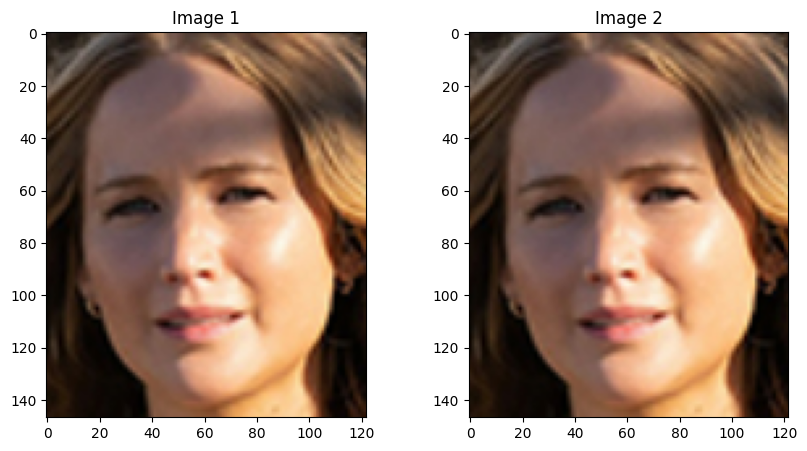

In [18]:
import cv2
import torch
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the first image using OpenCV
image_path1 = "test.png"
image1 = cv2.imread(image_path1)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Load and preprocess the second image using OpenCV
image_path2 = "test.png"  # Replace with the path to your second image
image2 = cv2.imread(image_path2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Ensure both images have the same dimensions
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Display the original images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image1)
axes[0].set_title('Image 1')

axes[1].imshow(image2)
axes[1].set_title('Image 2')

plt.show()



In [19]:
import cv2
import torch
import torchvision.transforms as transforms
import numpy as np

# Load and preprocess the first image using OpenCV
image_path1 = "test.png"
image1 = cv2.imread(image_path1)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Load and preprocess the second image using OpenCV
image_path2 = "test.png"  # Replace with the path to your second image
image2 = cv2.imread(image_path2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Ensure both images have the same dimensions
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Concatenate the two images along the channel dimension
concatenated_image = np.concatenate([image1, image2], axis=2)

# Display the shape of the concatenated image
print("Concatenated Image Shape:", concatenated_image.shape)

# Split the concatenated image into two separate images with 3 channels each
image1_part = concatenated_image[:, :, :3]
image2_part = concatenated_image[:, :, 3:]

# Define a transformation to match the model's expected input
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((height, width)),
    transforms.ToTensor(),
])

# Apply the transformation to each image
input_tensor1 = transform(image1_part).unsqueeze(0)  # Add an extra dimension for batch size
input_tensor2 = transform(image2_part).unsqueeze(0)  # Add an extra dimension for batch size

# Concatenate the two input tensors along the channel dimension
final_input_tensor = torch.cat([input_tensor1, input_tensor2], dim=1)
final_input_tensor = final_input_tensor.to(device="cuda",dtype=torch.float16)

# Display the shape of the final input tensor
print("Final Input Tensor Shape:", final_input_tensor.shape)
# print("dtype: ", final_input_tensor.dtype)

# Forward pass through the model
output = new_model(final_input_tensor)

# Print the shape of the output tensor
print("Model Output Shape:", output.shape)
print("Model Output:", output)

Concatenated Image Shape: (147, 122, 6)
Final Input Tensor Shape: torch.Size([1, 6, 224, 224])
Model Output Shape: torch.Size([1, 3])
Model Output: tensor([[-2.9316,  2.9336, -0.1633]], device='cuda:0', dtype=torch.float16, grad_fn=<AddBackward0>)


In [20]:
def print_output(output):
  age_output = output[:, 2]
  print("age_output: ",age_output)
  gender_output = output[:, :2].softmax(-1)
  print("gender_output: ",gender_output)
  gender_probs, gender_indx = gender_output.topk(1)

  for index in range(output.shape[0]):

      # get_age
      age = age_output[index].item()
      age = age * (95 - 1) + 48
      age = round(age, 2)

      print(f"\tage: {age}")
      gender = "male" if gender_indx[index].item() == 0 else "female"
      print(f"\tgender: {gender} [{int(gender_probs[index].item() * 100)}%]")
print_output(output)

age_output:  tensor([-0.1633], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
gender_output:  tensor([[0.0028, 0.9971]], device='cuda:0', dtype=torch.float16, grad_fn=<SoftmaxBackward0>)
	age: 32.65
	gender: female [99%]


In [21]:
import torch

# Assuming the model expects an input tensor of shape (batch_size, channels, height, width)
batch_size = 1  # You can adjust the batch size as needed
channels = 6  # RGB channels
height = 224  # Adjust based on the expected height for your model
width = 224  # Adjust based on the expected width for your model

# Generate a random input tensor
input_tensor = torch.randn(batch_size, channels, height, width, device="cuda", dtype=torch.float16)

# Print the shape of the input tensor
print("Random Input Tensor Shape:", input_tensor.shape)


Random Input Tensor Shape: torch.Size([1, 6, 224, 224])


In [22]:
!git clone https://github.com/khengyun/FaceMask_Agumentation.git

Cloning into 'FaceMask_Agumentation'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 83 (delta 13), reused 17 (delta 9), pack-reused 60
Receiving objects: 100% (83/83), 135.44 MiB | 5.56 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (27/27), done.


In [23]:
!pwd

/content/Masked_Age_Detection


In [24]:
!mv FaceMask_Agumentation/* .
!rm -rf ./FaceMask_Agumentation

In [25]:
!gdown 19NC_k_UUxDozQvG1mA4eL9_mGwSAomLx

Downloading...
From: https://drive.google.com/uc?id=19NC_k_UUxDozQvG1mA4eL9_mGwSAomLx
To: /content/Masked_Age_Detection/age_gender.csv
100% 200M/200M [00:04<00:00, 46.1MB/s]


# import data


In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Image processing
from PIL import Image
import cv2

In [41]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Masked_Age_Detection/age_gender.csv')

# Chuyển đổi cột "pixels" thành mảng 2D
df["pixels"] = df["pixels"].apply(lambda x: np.reshape(np.array(x.split(), dtype="float32"), (48, 48)))

# Lấy ngẫu nhiên 200 dòng
df = df.sample(n=200, random_state=42)  # random_state để giữ nguyên kết quả khi chạy lại mã

# In ra 5 dòng đầu tiên của mẫu ngẫu nhiên
print(df.head())


       age  ethnicity  gender                        img_name  \
17814   49          1       1  20170113184406976.jpg.chip.jpg   
15080   39          1       0  20170116001219696.jpg.chip.jpg   
22829    8          4       0  20170103200427437.jpg.chip.jpg   
16074   40          4       0  20170116213431880.jpg.chip.jpg   
8972    27          0       0  20170119150234550.jpg.chip.jpg   

                                                  pixels  
17814  [[31.0, 32.0, 28.0, 27.0, 34.0, 38.0, 37.0, 40...  
15080  [[186.0, 65.0, 38.0, 40.0, 36.0, 51.0, 64.0, 6...  
22829  [[20.0, 23.0, 35.0, 34.0, 45.0, 65.0, 69.0, 72...  
16074  [[6.0, 6.0, 13.0, 19.0, 15.0, 23.0, 41.0, 76.0...  
8972   [[31.0, 31.0, 29.0, 51.0, 98.0, 136.0, 162.0, ...  


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 17814 to 7376
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        200 non-null    int64 
 1   ethnicity  200 non-null    int64 
 2   gender     200 non-null    int64 
 3   img_name   200 non-null    object
 4   pixels     200 non-null    object
dtypes: int64(3), object(2)
memory usage: 9.4+ KB


In [29]:
fig = px.histogram(df, x="gender")
fig.update_layout(title_text='Age Histogram')
fig.show()

In [30]:
eth_values_to_labels = { 0: "White", 1: "Black", 2: "Asian", 3: "Indian", 4: "Hispanic" }
gender_values_to_labels = { 0: "Male", 1: "Female" }

In [31]:
fig = go.Figure([
    go.Bar(x=[eth_values_to_labels[i] for i in df.ethnicity.value_counts().index],
           y=df.ethnicity.value_counts().values)
])
fig.update_layout(
    title_text='Count Plot Ethnicity',
    xaxis_title='Ethnicity',
    yaxis_title='Count'
)
fig.show()

In [32]:
def plot_data(rows, cols, lower_value, upper_value):

    figure = plt.figure(figsize=(cols*3,rows*4))
    for i in range(1, cols*rows + 1):
        k = np.random.randint(lower_value,upper_value)
        figure.add_subplot(rows, cols, i) # adding sub plot

        gender = gender_values_to_labels[df.gender[k]]
        ethnicity = eth_values_to_labels[df.ethnicity[k]]
        age = df.age[k]

        im = df.pixels[k]
        # im = np.reshape(im, (48,48))
        plt.imshow(im, cmap='gray')
        plt.axis('off')
        plt.title(f'Gender:{gender}\nAge:{age}\nEthnicity:{ethnicity}')

    plt.tight_layout()
    plt.show()

In [33]:
from landmark_crop import FaceCropper
device = "cuda" if torch.cuda.is_available() else "cpu"

class dataset(Dataset):
    def __init__(self, df, face_cropper):
        self.df = df
        self.normalize = transforms.Normalize(mean = [0.485,0.456,0.406,0.485,0.456,0.406],std = [0.229,0.224,0.225, 0.229,0.224,0.225])
        self.face_cropper = face_cropper

    def __len__(self):
        return len(self.df)

    def __getitem__(self, ix):
        file = self.df.iloc[ix]
        age = torch.tensor(file.age / 116)
        gender = torch.tensor(file.gender).view(-1)
        eth = torch.tensor(file.ethnicity)
        im = file.pixels
        im = np.array(Image.fromarray(im).convert("RGB"))
        # print(im.shape)

        # Use the FaceCropper to crop faces before normalization
        cropped_faces = self.face_cropper.crop_faces_and_concat(im, mask=False)
        # print(cropped_faces.shape)

        # Assuming you want to use the first cropped face (you can modify this as needed)
        im = cropped_faces

        # im = cv.resize(im, (224, 224))
        # im = torch.tensor(im).permute(2, 1, 2)
        # im = torch.tensor(im).permute(2,0,1)
        im = self.normalize(im/255)


        return im.float().to(device), age.to(device), gender.float().to(device), eth.to(device)

In [34]:
df.iloc[0]


age                                                         49
ethnicity                                                    1
gender                                                       1
img_name                        20170113184406976.jpg.chip.jpg
pixels       [[31.0, 32.0, 28.0, 27.0, 34.0, 38.0, 37.0, 40...
Name: 17814, dtype: object

In [42]:
msk = np.random.randn(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [43]:
train_new = dataset(train, FaceCropper())
val_new = dataset(test, FaceCropper())
train_loader = DataLoader(train_new,batch_size = 16,shuffle = True)
val_loader = DataLoader(val_new,batch_size = 16)

In [44]:
im,a,b,c = next(iter(val_loader))

In [48]:
from mivolo.model.mi_volo import MiVOLO
new_model = MiVOLO("/content/Masked_Age_Detection/models/new_mivolo.pth.tar","cuda")
new_model = new_model.model_load()
# Set the model to evaluation mode
# new_model.eval()

In [46]:
optimizer = torch.optim.Adam(new_model.parameters(), lr = 1e-4)
age_criterion = nn.MSELoss().to(device, dtype = torch.float16)  # Update to mean squared error for age loss
gender_criterion = nn.BCEWithLogitsLoss().to(device, dtype = torch.float16)  # Update to binary cross-entropy for gender loss

In [ ]:
import time
from tqdm import tqdm
import torch

n_epochs = 5
val_age_maes = []
train_losses = []
val_losses = []
best_val_loss = float('inf')  # initialize with positive infinity
start = time.time()

for epoch in range(n_epochs):
    epoch_train_loss, epoch_val_loss = 0, 0
    val_age_mae, ctr = 0, 0

    for loader, is_train in [(train_loader, True), (val_loader, False)]:
        new_model.train() if is_train else new_model.eval()

        for data in tqdm(loader, desc=f"Epoch {epoch + 1}/{n_epochs} {'Train' if is_train else 'Validation'}"):
            im, age, gen, eth = data

            im, age, gen, _ = im.to(device, dtype = torch.float16), age.to(device, dtype = torch.float16), gen.to(device,dtype = torch.float16), eth.to(device,dtype = torch.float16)


            with torch.set_grad_enabled(is_train):
                kept = new_model(im)
                # print("kept: ", kept)
                # print("kept: ", kept.shape)
                # print("kept: ", kept.dtype)
                pred_age = kept[:, 2]
                pred_gen = kept[:, :2]
                gender_probs, gender_indx = pred_gen.topk(1)

                print("============")
                print(pred_age)
                print(age)
                print("============")

                age_loss = age_criterion(pred_age.to(device, dtype = torch.float16), age)
                # print("age_loss: ", age_loss)
                gen_loss = gender_criterion(gender_indx.float(), gen.view(-1, 1))
                # print("gen_loss: ", gen_loss)
                total_loss = age_loss + gen_loss


                if is_train:
                    optimizer.zero_grad()
                    total_loss = total_loss  # Cast to the desired dtype
                    total_loss.backward()
                    optimizer.step()
                    epoch_train_loss += total_loss.item()
                else:
                    pred_gender = (gender_indx > 0.5).float()  # Use gender_probs for thresholding
                    gender_acc = (pred_gender == gen).float()
                    age_mae = torch.abs(age - pred_age).float().sum()
                    val_age_mae += age_mae
                    epoch_val_loss += total_loss.item()
                    ctr += len(data[0])

    val_age_mae /= ctr
    epoch_train_loss /= len(train_loader)
    epoch_val_loss /= len(val_loader)
    elapsed = time.time() - start
    best_val_loss = min(best_val_loss, epoch_val_loss)

    print(f'{epoch + 1}/{n_epochs} ({elapsed:.2f}s - {(n_epochs - epoch) * (elapsed / (epoch + 1)):.2f}s remaining)')
    info = f'''Epoch: {epoch + 1} \tTrain Loss: {epoch_train_loss:.3f} \tVal Loss: {epoch_val_loss:.3f} \tBest Val Loss: {best_val_loss:.4f}'''
    info += f'%\t Age MAE: {val_age_mae:.2f}'  # Fix the print statement
    print(info)

    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    val_age_maes.append(val_age_mae)


Epoch 1/5 Train:   0%|          | 0/10 [00:00<?, ?it/s]

tensor([-0.1429, -0.1577, -0.1649, -0.1564, -0.1329, -0.1626, -0.1626, -0.1526, -0.0447, -0.1388, -0.1439, -0.1400, -0.1888, -0.1459, -0.1289, -0.1505], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.2241, 0.3018, 0.3794, 0.0086, 0.2069, 0.2673, 0.3018, 0.0172, 0.4053, 0.3621, 0.2500, 0.5605, 0.1724, 0.2156, 0.5864, 0.0086], device='cuda:0', dtype=torch.float16)


Epoch 1/5 Train:  20%|██        | 2/10 [00:01<00:07,  1.06it/s]

tensor([-0.1514, -0.1721, -0.1395, -0.0967, -0.1475, -0.1577, -0.1547, -0.1588, -0.1637, -0.1583, -0.1580, -0.1597, -0.1294, -0.1349, -0.1332, -0.1608], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.0690, 0.2328, 0.1897, 0.2585, 0.4741, 0.2500, 0.3362, 0.2673, 0.1207, 0.2932, 0.0690, 0.3103, 0.3103, 0.2069, 0.4741, 0.2413], device='cuda:0', dtype=torch.float16)


Epoch 1/5 Train:  30%|███       | 3/10 [00:03<00:07,  1.03s/it]

tensor([-0.1517, -0.1486, -0.1426, -0.1389, -0.1481, -0.1321, -0.1599, -0.1442, -0.1466, -0.1320, -0.1484, -0.1501, -0.2515, -0.0865, -0.1432, -0.0915], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.7329, 0.2156, 0.0259, 0.5518, 0.2241, 0.2241, 0.2413, 0.0086, 0.3362, 0.7070, 0.4827, 0.2932, 0.1982, 0.1810, 0.6035, 0.3018], device='cuda:0', dtype=torch.float16)


Epoch 1/5 Train:  40%|████      | 4/10 [00:04<00:06,  1.11s/it]

tensor([-0.1219, -0.1505, -0.1543, -0.1261, -0.1580, -0.1447, -0.1348, -0.1807, -0.1520, -0.1620, -0.1552, -0.1431, -0.1450, -0.1521, -0.1567, -0.1461], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.3706, 0.5259, 0.0259, 0.2673, 0.3018, 0.5347, 0.0776, 0.0776, 0.0345, 0.2500, 0.4312, 0.2069, 0.5864, 0.5171, 0.2241, 0.4397], device='cuda:0', dtype=torch.float16)


Epoch 1/5 Train:  50%|█████     | 5/10 [00:05<00:05,  1.16s/it]

tensor([-0.1016, -0.1486, -0.1570, -0.1383, -0.1072, -0.1660, -0.1344, -0.1422, -0.1552, -0.1489, -0.1482, -0.1714, -0.1333, -0.1437, -0.1536, -0.1433], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.2932, 0.2156, 0.4741, 0.4656, 0.5000, 0.0345, 0.5518, 0.4312, 0.4741, 0.1982, 0.2673, 0.1982, 0.5864, 0.5776, 0.3018, 0.0086], device='cuda:0', dtype=torch.float16)


Epoch 1/5 Train:  60%|██████    | 6/10 [00:06<00:04,  1.08s/it]

tensor([-0.1584, -0.1593, -0.1533, -0.1277, -0.1586, -0.1492, -0.1456, -0.1709, -0.1372, -0.1487, -0.1271, -0.1736, -0.1578, -0.1331, -0.1355, -0.1660], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.2241, 0.2156, 0.1207, 0.5347, 0.0259, 0.0086, 0.0086, 0.2156, 0.2156, 0.2413, 0.1724, 0.2241, 0.2069, 0.1466, 0.2241, 0.3879], device='cuda:0', dtype=torch.float16)


Epoch 1/5 Train:  70%|███████   | 7/10 [00:07<00:03,  1.03s/it]

tensor([-0.1404, -0.1242, -0.1323, -0.1185, -0.2242, -0.1525, -0.1414, -0.0791, -0.1525, -0.1427, -0.1459, -0.1458, -0.1464, -0.1377, -0.1393, -0.1566], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.2759, 0.2241, 0.0086, 0.3535, 0.2328, 0.2328, 0.2069, 0.3447, 0.2932, 0.4741, 0.2500, 0.5259, 0.2069, 0.2500, 0.4656, 0.3103], device='cuda:0', dtype=torch.float16)


Epoch 1/5 Train:  80%|████████  | 8/10 [00:08<00:01,  1.02it/s]

tensor([-0.1664, -0.1581, -0.1449, -0.1427, -0.1381, -0.1611, -0.1465, -0.1509, -0.1263, -0.1552, -0.1617, -0.1110, -0.1567, -0.1786, -0.1440, -0.1433], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.1552, 0.1982, 0.4656, 0.2759, 0.0776, 0.6724, 0.5605, 0.4656, 0.0172, 0.2328, 0.0259, 0.1552, 0.4312, 0.5605, 0.0431, 0.2844], device='cuda:0', dtype=torch.float16)


Epoch 1/5 Train:  90%|█████████ | 9/10 [00:09<00:00,  1.05it/s]

tensor([-0.1376, -0.1299, -0.1628, -0.1354, -0.1415, -0.1470, -0.1451, -0.1292, -0.1483, -0.1555, -0.1578, -0.1774, -0.1361, -0.1559, -0.1384, -0.1575], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.3103, 0.7588, 0.2241, 0.2673, 0.0690, 0.3103, 0.1810, 0.4312, 0.2156, 0.2156, 0.7329, 0.2328, 0.3018, 0.1897, 0.5259, 0.3362], device='cuda:0', dtype=torch.float16)


Epoch 1/5 Train: 100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


tensor([-0.1401, -0.1490, -0.0899, -0.1470, -0.1647, -0.1536, -0.1519, -0.2169, -0.1107, -0.1520, -0.1084, -0.1614, -0.1445], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.3018, 0.2328, 0.4138, 0.3018, 0.0086, 0.2241, 0.3018, 0.1810, 0.0086, 0.3879, 0.1293, 0.3018, 0.1724], device='cuda:0', dtype=torch.float16)


Epoch 1/5 Validation:  33%|███▎      | 1/3 [00:00<00:01,  1.18it/s]

tensor([-0.1127, -0.1230, -0.1188, -0.1021, -0.1158, -0.1132, -0.0797, -0.1088, -0.1165, -0.1154, -0.1115, -0.1085, -0.1160, -0.0982, -0.1066, -0.0936], device='cuda:0', dtype=torch.float16)
tensor([0.4224, 0.3447, 0.4656, 0.3103, 0.5347, 0.2585, 0.5947, 0.3103, 0.0690, 0.4482, 0.5605, 0.3362, 0.2413, 0.2241, 0.3103, 0.2500], device='cuda:0', dtype=torch.float16)


Epoch 1/5 Validation:  67%|██████▋   | 2/3 [00:01<00:00,  1.21it/s]

tensor([-0.1187, -0.1234, -0.1191, -0.1162, -0.1153, -0.1181, -0.1138, -0.0982, -0.1122, -0.1130, -0.1284, -0.1343, -0.1153, -0.1180, -0.1130, -0.1129], device='cuda:0', dtype=torch.float16)
tensor([0.0862, 0.2241, 0.4741, 0.0431, 0.3794, 0.2585, 0.1466, 0.1897, 0.3706, 0.0172, 0.0345, 0.2069, 0.2241, 0.2069, 0.4915, 0.0259], device='cuda:0', dtype=torch.float16)


Epoch 1/5 Validation: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]


tensor([-0.1073, -0.1007, -0.1162, -0.1339, -0.1047, -0.1132, -0.1158, -0.0889, -0.1362, -0.1041, -0.1117], device='cuda:0', dtype=torch.float16)
tensor([0.5088, 0.7329, 0.2241, 0.2241, 0.6377, 0.7329, 0.2585, 0.5605, 0.2673, 0.5518, 0.1982], device='cuda:0', dtype=torch.float16)
1/5 (12.13s - 60.66s remaining)
Epoch: 1 	Train Loss: 0.944 	Val Loss: 0.931 	Best Val Loss: 0.9307%	 Age MAE: 0.44


Epoch 2/5 Train:   0%|          | 0/10 [00:00<?, ?it/s]

tensor([-0.1455, -0.1597, -0.1256, -0.2177, -0.1370, -0.1573, -0.2556, -0.1581, -0.1377, -0.1356, -0.1367, -0.1919, -0.1473, -0.1350, -0.1705, -0.1560], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.5605, 0.3018, 0.2673, 0.2328, 0.1897, 0.4741, 0.1982, 0.2932, 0.2500, 0.0776, 0.2156, 0.1724, 0.2241, 0.2069, 0.2241, 0.4741], device='cuda:0', dtype=torch.float16)


Epoch 2/5 Train:  20%|██        | 2/10 [00:01<00:07,  1.05it/s]

tensor([-0.1440, -0.1450, -0.1456, -0.1588, -0.1528, -0.1572, -0.1305, -0.1665, -0.1116, -0.1425, -0.1451, -0.1625, -0.2186, -0.1317, -0.1453, -0.1422], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.4741, 0.1724, 0.2069, 0.2413, 0.3018, 0.2500, 0.7588, 0.1552, 0.0086, 0.4312, 0.0086, 0.3018, 0.1810, 0.4741, 0.0690, 0.4656], device='cuda:0', dtype=torch.float16)


Epoch 2/5 Train:  30%|███       | 3/10 [00:02<00:06,  1.10it/s]

tensor([-0.1415, -0.1335, -0.1488, -0.1144, -0.1471, -0.1565, -0.1544, -0.1294, -0.1531, -0.1427, -0.1340, -0.1656, -0.1538, -0.1573, -0.1782, -0.1479], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.2069, 0.2241, 0.3879, 0.3706, 0.3103, 0.0086, 0.2932, 0.5864, 0.0172, 0.2844, 0.0086, 0.3794, 0.2241, 0.3362, 0.0776, 0.0690], device='cuda:0', dtype=torch.float16)


Epoch 2/5 Train:  40%|████      | 4/10 [00:03<00:05,  1.04it/s]

tensor([-0.1575, -0.0858, -0.1626, -0.1642, -0.1516, -0.1697, -0.1355, -0.1460, -0.1440, -0.1414, -0.1439, -0.1301, -0.1489, -0.1351, -0.1395, -0.1562], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.2156, 0.4138, 0.6724, 0.0259, 0.2328, 0.0345, 0.2241, 0.5259, 0.2241, 0.0259, 0.1810, 0.4312, 0.4827, 0.2673, 0.3018, 0.2069], device='cuda:0', dtype=torch.float16)


Epoch 2/5 Train:  50%|█████     | 5/10 [00:05<00:05,  1.08s/it]

tensor([-0.1064, -0.1528, -0.1185, -0.1343, -0.1511, -0.1658, -0.1580, -0.0770, -0.1798, -0.0961, -0.1477, -0.1575, -0.1802, -0.1406, -0.1658, -0.1461], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.2932, 0.0259, 0.1293, 0.2069, 0.5259, 0.3879, 0.2673, 0.3447, 0.2328, 0.2585, 0.3362, 0.3103, 0.0086, 0.2759, 0.2328, 0.2156], device='cuda:0', dtype=torch.float16)


Epoch 2/5 Train:  60%|██████    | 6/10 [00:06<00:04,  1.14s/it]

tensor([-0.1621, -0.1532, -0.1577, -0.1348, -0.1482, -0.1289, -0.1572, -0.1272, -0.1412, -0.1387, -0.1438, -0.1344, -0.1578, -0.1538, -0.1500, -0.1274], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.2500, 0.1207, 0.3018, 0.5864, 0.2328, 0.3103, 0.3362, 0.2241, 0.2069, 0.3621, 0.6035, 0.5518, 0.3103, 0.0086, 0.2932, 0.0172], device='cuda:0', dtype=torch.float16)


Epoch 2/5 Train:  70%|███████   | 7/10 [00:07<00:03,  1.07s/it]

tensor([-0.1562, -0.1351, -0.1526, -0.1707, -0.1459, -0.1096, -0.1636, -0.1448, -0.1368, -0.1486, -0.1490, -0.1554, -0.1433, -0.1442, -0.1559, -0.1499], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.4312, 0.0776, 0.0345, 0.2156, 0.4741, 0.1552, 0.2673, 0.5347, 0.4656, 0.2156, 0.1982, 0.2156, 0.2413, 0.2500, 0.2241, 0.7329], device='cuda:0', dtype=torch.float16)


Epoch 2/5 Train:  80%|████████  | 8/10 [00:08<00:02,  1.01s/it]

tensor([-0.1388, -0.1510, -0.1206, -0.1581, -0.1575, -0.0891, -0.1707, -0.1484, -0.1615, -0.1444, -0.1311, -0.1449, -0.1422, -0.1443, -0.1271, -0.1442], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.3103, 0.4656, 0.3535, 0.7329, 0.1897, 0.3018, 0.2328, 0.2673, 0.2241, 0.5864, 0.7070, 0.0431, 0.0086, 0.0086, 0.5347, 0.5776], device='cuda:0', dtype=torch.float16)


Epoch 2/5 Train:  90%|█████████ | 9/10 [00:09<00:00,  1.02it/s]

tensor([-0.1477, -0.1487, -0.1550, -0.1398, -0.1010, -0.1378, -0.1437, -0.1743, -0.1670, -0.0874, -0.1547, -0.1361, -0.1370, -0.1460, -0.1420, -0.1456], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.2156, 0.0086, 0.2241, 0.5605, 0.5000, 0.5518, 0.2759, 0.1982, 0.2413, 0.1810, 0.4312, 0.3018, 0.5259, 0.2500, 0.0690, 0.4397], device='cuda:0', dtype=torch.float16)


Epoch 2/5 Train: 100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


tensor([-0.1617, -0.1393, -0.1576, -0.1567, -0.1636, -0.1530, -0.1544, -0.1328, -0.1775, -0.1486, -0.1591, -0.0458, -0.1260], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.1207, 0.4656, 0.2156, 0.1982, 0.3018, 0.5171, 0.3018, 0.1466, 0.5605, 0.3018, 0.0259, 0.4053, 0.1724], device='cuda:0', dtype=torch.float16)


Epoch 2/5 Validation:  33%|███▎      | 1/3 [00:00<00:01,  1.20it/s]

tensor([-0.1118, -0.1233, -0.1210, -0.1054, -0.1162, -0.1101, -0.0887, -0.1177, -0.1182, -0.1171, -0.1198, -0.1106, -0.1219, -0.1029, -0.1119, -0.0921], device='cuda:0', dtype=torch.float16)
tensor([0.4224, 0.3447, 0.4656, 0.3103, 0.5347, 0.2585, 0.5947, 0.3103, 0.0690, 0.4482, 0.5605, 0.3362, 0.2413, 0.2241, 0.3103, 0.2500], device='cuda:0', dtype=torch.float16)


Epoch 2/5 Validation:  67%|██████▋   | 2/3 [00:01<00:00,  1.22it/s]

tensor([-0.1256, -0.1191, -0.1122, -0.1221, -0.1199, -0.1215, -0.1156, -0.0782, -0.1153, -0.1154, -0.1353, -0.1382, -0.1147, -0.1213, -0.1148, -0.1180], device='cuda:0', dtype=torch.float16)
tensor([0.0862, 0.2241, 0.4741, 0.0431, 0.3794, 0.2585, 0.1466, 0.1897, 0.3706, 0.0172, 0.0345, 0.2069, 0.2241, 0.2069, 0.4915, 0.0259], device='cuda:0', dtype=torch.float16)


Epoch 2/5 Validation: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]


tensor([-0.1102, -0.1049, -0.1224, -0.1294, -0.1206, -0.1155, -0.1108, -0.1001, -0.1335, -0.1125, -0.1163], device='cuda:0', dtype=torch.float16)
tensor([0.5088, 0.7329, 0.2241, 0.2241, 0.6377, 0.7329, 0.2585, 0.5605, 0.2673, 0.5518, 0.1982], device='cuda:0', dtype=torch.float16)
2/5 (24.20s - 48.39s remaining)
Epoch: 2 	Train Loss: 0.935 	Val Loss: 0.918 	Best Val Loss: 0.9178%	 Age MAE: 0.44


Epoch 3/5 Train:  10%|█         | 1/10 [00:00<00:08,  1.01it/s]

tensor([-0.1538, -0.1530, -0.1456, -0.1486, -0.1527, -0.1500, -0.1467, -0.1561, -0.1714, -0.1387, -0.0989, -0.1503, -0.1558, -0.1368, -0.1516, -0.1627], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.2241, 0.2500, 0.4397, 0.2328, 0.0345, 0.4656, 0.2069, 0.2932, 0.2328, 0.1810, 0.5000, 0.2932, 0.2156, 0.3621, 0.4827, 0.2500], device='cuda:0', dtype=torch.float16)


Epoch 3/5 Train:  20%|██        | 2/10 [00:01<00:07,  1.05it/s]

tensor([-0.1576, -0.1436, -0.1558, -0.1116, -0.1461, -0.1361, -0.1755, -0.1465, -0.1383, -0.0431, -0.1572, -0.1425, -0.1569, -0.0791, -0.1554, -0.1584], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
tensor([0.7329, 0.4741, 0.3018, 0.1293, 0.5259, 0.0776, 0.2328, 0.4741, 0.5605, 0.4053, 0.3103, 0.4312, 0.2500, 0.3447, 0.4741, 0.2673], device='cuda:0', dtype=torch.float16)


Epoch 3/5 Train:  30%|███       | 3/10 [00:02<00:06,  1.08it/s]